# **Hand Written Digit Recognition**
---



## **Objective**

1. **Develop a model**: Create a machine learning model capable of recognizing handwritten digits (0-9).
2. **Image processing**: Utilize image processing techniques to prepare the handwritten digit images for the model.
3. **Model training and evaluation**: Train the model on a dataset of labeled images and evaluate its performance using metrics like accuracy.
4. **Practical application**: Potentially develop an application that can recognize handwritten digits in real-world scenarios.

## **Data Source**

The project utilizes the `load_digits` function `from the sklearn.datasets` module to obtain the handwritten digit dataset.

## **Import Library**

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits

## **Import Data**

In [3]:
df = load_digits()

## **Describe Data**

In [4]:
# Display dataset information
print("Dataset shape:", df.images.shape)
print("Dataset target names:", df.target_names)
print("Number of samples:", len(df.images))
print("Image shape:", df.images[0].shape)
print("Pixel value range:", df.images.min(), "to", df.images.max())

Dataset shape: (1797, 8, 8)
Dataset target names: [0 1 2 3 4 5 6 7 8 9]
Number of samples: 1797
Image shape: (8, 8)
Pixel value range: 0.0 to 16.0


## **Data Visualization**

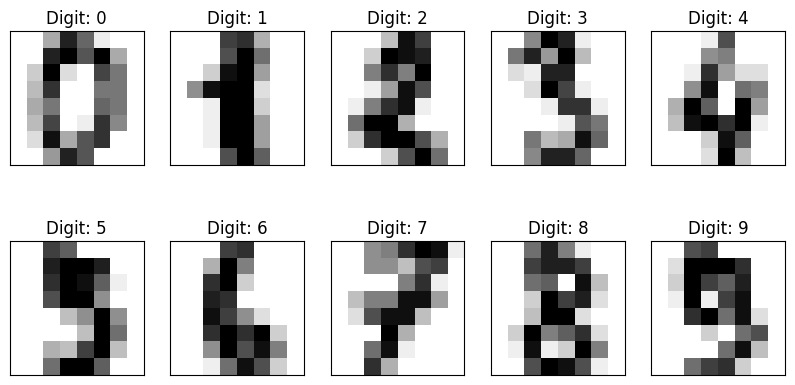

In [5]:
# Display the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(df.images[i], cmap=plt.cm.gray_r)
    ax.set_title(f"Digit: {df.target[i]}")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

<ipython-input-6-cd70c57cf81f>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df.target, cmap=plt.cm.get_cmap('viridis', 10))


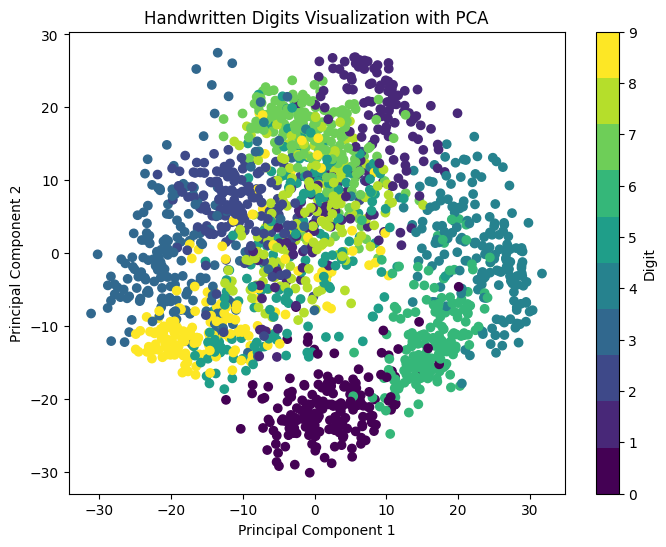

In [6]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.data)

# Visualize the data in 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df.target, cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label="Digit")
plt.title("Handwritten Digits Visualization with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

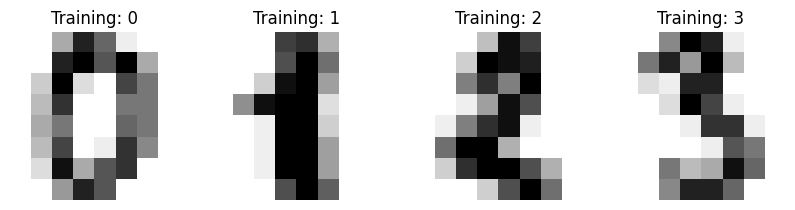

In [7]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,5))
for ax, image, label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)#,interpolation="nearest")
    ax.set_title("Training: %i"% label)


## **Data Preprocessing**

In [8]:
df.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[10].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
# Reshaping
samples=len(df.images)
data=df.images.reshape(samples,-1)

In [13]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [15]:
data[10].shape

(64,)

In [16]:
data.shape

(1797, 64)

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
# Normalization/Scaling
data=data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

1.0

In [22]:
data[10]

array([0.    , 0.    , 0.0625, 0.5625, 0.9375, 0.6875, 0.    , 0.    ,
       0.    , 0.    , 0.6875, 1.    , 0.5   , 0.875 , 0.375 , 0.    ,
       0.    , 0.125 , 1.    , 0.625 , 0.    , 0.5625, 0.5625, 0.    ,
       0.    , 0.0625, 1.    , 0.25  , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.25  , 1.    , 0.25  , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.0625, 1.    , 0.3125, 0.0625, 0.6875, 0.1875, 0.    ,
       0.    , 0.    , 0.75  , 0.75  , 0.625 , 0.625 , 0.    , 0.    ,
       0.    , 0.    , 0.0625, 0.625 , 0.8125, 0.1875, 0.    , 0.    ])

## **Define Target Variable (y) and Feature Variables (X)**

In [23]:
y = df.target
x = data

## **Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [26]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model=RandomForestClassifier()

In [29]:
model.fit(x_train,y_train)

RandomForestClassifier()

## **Model Evaluation**

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_pred

array([2, 2, 2, 6, 3, 6, 7, 0, 7, 7, 2, 7, 0, 3, 5, 9, 1, 4, 9, 5, 3, 6,
       2, 8, 7, 5, 9, 4, 2, 6, 3, 9, 4, 4, 3, 5, 3, 7, 3, 9, 5, 9, 1, 6,
       4, 5, 0, 6, 3, 5, 2, 8, 0, 3, 1, 1, 2, 0, 9, 5, 7, 6, 3, 0, 0, 3,
       9, 7, 2, 0, 7, 2, 1, 0, 8, 0, 5, 4, 1, 8, 5, 2, 5, 3, 5, 7, 6, 2,
       9, 5, 7, 6, 0, 6, 6, 8, 0, 7, 8, 4, 9, 1, 8, 9, 0, 5, 7, 6, 9, 8,
       6, 1, 7, 2, 7, 5, 7, 7, 4, 5, 3, 2, 1, 5, 0, 2, 7, 8, 7, 5, 0, 7,
       2, 0, 1, 1, 3, 1, 9, 3, 8, 5, 7, 2, 0, 1, 5, 7, 3, 1, 0, 1, 5, 7,
       4, 6, 1, 0, 8, 2, 4, 5, 3, 2, 9, 8, 6, 8, 2, 8, 9, 5, 8, 0, 3, 8,
       4, 1, 7, 7, 4, 6, 7, 4, 9, 1, 3, 4, 7, 5, 6, 4, 0, 1, 5, 7, 1, 7,
       1, 2, 6, 7, 5, 5, 8, 1, 2, 5, 9, 4, 8, 8, 7, 9, 0, 0, 9, 3, 6, 7,
       1, 0, 0, 8, 0, 3, 5, 6, 9, 0, 8, 3, 8, 0, 8, 9, 1, 1, 3, 2, 4, 0,
       4, 9, 3, 1, 0, 2, 8, 0, 9, 9, 4, 8, 7, 8, 8, 7, 5, 7, 0, 0, 1, 3,
       0, 4, 4, 1, 5, 1, 1, 7, 3, 1, 3, 1, 2, 2, 4, 8, 6, 2, 2, 0, 2, 2,
       1, 0, 3, 9, 4, 9, 1, 0, 9, 1, 9, 1, 6, 2, 8,

In [32]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       0.94      1.00      0.97        50
           2       1.00      0.98      0.99        57
           3       1.00      0.96      0.98        55
           4       1.00      1.00      1.00        57
           5       0.93      1.00      0.96        50
           6       1.00      0.98      0.99        45
           7       1.00      1.00      1.00        61
           8       0.98      0.93      0.95        56
           9       1.00      0.98      0.99        45

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [34]:
print(f'Accuracy : {accuracy_score(y_test,y_pred)*100:.2f}%')

Accuracy : 98.33%


## **Prediction**

Prediction for the first test sample: 2


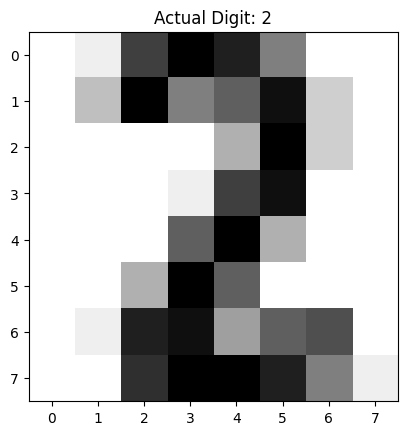

In [35]:
# Example prediction on a single data point from x_test
single_prediction = model.predict(x_test[0].reshape(1, -1)) # Reshape is crucial for single prediction.
print(f"Prediction for the first test sample: {single_prediction[0]}")

# View the image of the first test sample
plt.imshow(x_test[0].reshape(8, 8), cmap=plt.cm.gray_r)
plt.title(f"Actual Digit: {y_test[0]}")
plt.show()

Predictions for the first 5 test samples: [2 2 2 6 3]


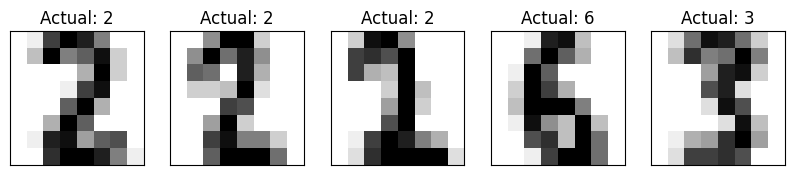

In [36]:
# Example prediction on multiple data points
multiple_predictions = model.predict(x_test[:5]) # Predict for the first 5 samples in x_test
print(f"Predictions for the first 5 test samples: {multiple_predictions}")

# View the images of the first 5 test samples
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title(f"Actual: {y_test[i]}")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

## **Explaination**

The model is used to predict the digits for single and multiple data points from the test set.
The predictions are compared to the actual labels to assess the model's accuracy.